## Example

In [11]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from DPDAnalysis import *

In [2]:
pd.options.display.max_columns = 100

In [3]:
X = create_mob(pd.read_csv('input_delinquent_application_202111.csv'))

Total running time: 00:00:11


In [4]:
Fraud = pd.read_csv('delinquent_application_flag.csv')[["apl_no","flag_fraud"]]\
.rename(columns={"apl_no":"apl_grp_no","flag_fraud":"flag"})

In [5]:
X = X.merge(Fraud, how='left', on="apl_grp_no")
del Fraud

In [6]:
dpd_cols = ["M0","M1","M2","M3","M4","M5"]
osb_cols = ["M0_OS","M1_OS","M2_OS","M3_OS","M4_OS","M5_OS"]
colors   = ["#1B9CFC","#CAD3C8","#F97F51","#FC427B"]

In [7]:
X["M0"] = X["M0"].fillna(0)
X["clean"] = X[dpd_cols].sum(1)==0
X["flag"]  = np.where(X["flag"]==1, "Fraud", "Normal")
cat = {"DS":"Self-Apply", "EA":"E_App", "QR":"Paper"}
X["apl_grp_type"] = X["apl_grp_type"].apply(lambda x:cat[x[:2]])
X["M0_pWDL"] = X["M0_PNP"] / X["fnl_cr_lmt"]
X["M1_pWDL"] = X["M1_PNP"] / X["fnl_cr_lmt"]
X["util90"]  = np.fmax(X["M0_pWDL"], X["M1_pWDL"])>=90

In [8]:
X.head()

,ip_id,pd_lvl2,cust_type,apl_grp_no,apl_grp_type,fnl_apl_dcsn_dt,fnl_cr_lmt,fico_scor,M0,M1,M2,M3,M4,M5,M0_OS,M1_OS,M2_OS,M3_OS,M4_OS,M5_OS,M0_PNP,M1_PNP,M2_PNP,flag,clean,M0_pWDL,M1_pWDL,util90
0,1595,KPL,Salary Earner,DS-B21112803194,Self-Apply,2021-11-30,17000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,17034.93,17395.89,16816.11,16191.67,15586.81,14958.60,17000.0,17000.00,16477.53,Normal,True,1.000000,1.000000,False
1,1845,CC,Salary Earner,DS-B2111260C5AC,Self-Apply,2021-11-30,31000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00,30989.30,29843.03,28741.96,27646.42,31233.15,0.0,30963.00,29439.30,Normal,True,0.000000,0.998806,False
2,2473,CC,Salary Earner,DS-B21112105700,Self-Apply,2021-11-30,43000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1353.00,12022.23,15435.23,18931.33,20413.32,26088.00,1353.0,11943.20,15160.02,Normal,True,0.031465,0.277749,False
3,2473,KEC,Salary Earner,DS-B21112105CE9,Self-Apply,2021-11-30,11000,694.0,0.0,0.0,0.0,0.0,0.0,0.0,11000.00,11000.00,10950.00,10614.69,10674.53,11086.10,11000.0,11000.00,10950.00,Normal,True,1.000000,1.000000,False
4,2598,CC,Salary Earner,EA-211125000728,E_App,2021-11-30,23000,621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3612.35,0.00,6361.66,8400.66,11119.34,0.0,3612.35,0.00,Normal,True,0.000000,0.157059,False


## Averge delinquency

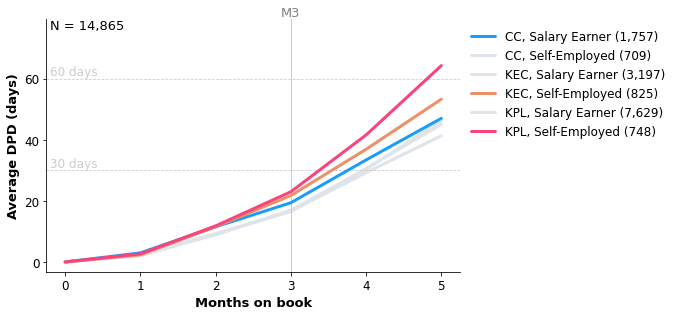

In [12]:
# "flag" "cust_type","apl_grp_type", "pd_lvl2"
groupby = ["pd_lvl2", "cust_type"] 
ax = plot_avgdpd(X.loc[X["clean"]==False], groupby, dpd_cols, 
                 start_mth=0, colors=colors, focus="M3", n_tops=3, 
                 ax=plt.subplots(figsize=(9.5,4.5))[1])

In [13]:
groupby_table(X.loc[X["clean"]==False], groupby, dpd_cols)

N        M0        M1         M2         M3  \
pd_lvl2 cust_type                                                       
CC      Salary Earner  1757  0.013090  2.974957  11.501992  19.392593   
        Self-Employed   709  0.000000  1.968970   9.112835  16.499295   
KEC     Salary Earner  3197  0.037222  2.486706   9.331140  16.598997   
        Self-Employed   825  0.001212  2.343030  11.544242  21.743030   
KPL     Salary Earner  7629  0.015729  2.365448   8.854221  17.037124   
        Self-Employed   748  0.000000  2.647059  11.807487  22.983957   

                              M4         M5  
pd_lvl2 cust_type                            
CC      Salary Earner  33.408314  47.020501  
        Self-Employed  30.589563  45.036775  
KEC     Salary Earner  29.254545  41.315459  
        Self-Employed  36.890909  53.294046  
KPL     Salary Earner  30.368400  46.259342  
        Self-Employed  41.582329  64.283802

In [14]:
groupby_table(X.loc[X["clean"]==False], groupby, osb_cols, 
              np.nansum, factor=1/10**6)

N       M0_OS       M1_OS       M2_OS       M3_OS  \
pd_lvl2 cust_type                                                             
CC      Salary Earner  1757    9.157084   20.194408   24.712070   29.679988   
        Self-Employed   709    8.800038   18.396231   23.301532   30.684498   
KEC     Salary Earner  3197   58.255892   68.506719   69.993572   72.690903   
        Self-Employed   825   48.817680   59.560702   61.562549   64.261457   
KPL     Salary Earner  7629  162.547851  162.496417  161.515799  160.784333   
        Self-Employed   748   88.578132   90.094874   89.858213   90.028720   

                            M4_OS       M5_OS  
pd_lvl2 cust_type                              
CC      Salary Earner   42.719003   46.446120  
        Self-Employed   41.269355   51.410811  
KEC     Salary Earner   73.793261   74.446608  
        Self-Employed   65.668621   66.551549  
KPL     Salary Earner  160.524370  160.782477  
        Self-Employed   90.669635   91.773494

## Vintage analysis

In [15]:
vintage_table(X, groupby, dpd_cols, dpd_geq=60)

N   M0   M1   M2        M3        M4        M5
pd_lvl2 cust_type                                                        
CC      Salary Earner  20165  0.0  0.0  0.0  0.000000  0.014707  0.022659
        Self-Employed   6023  0.0  0.0  0.0  0.000000  0.012111  0.028455
KEC     Salary Earner  20944  0.0  0.0  0.0  0.000144  0.020244  0.034027
        Self-Employed   4477  0.0  0.0  0.0  0.000000  0.027003  0.058837
KPL     Salary Earner  48203  0.0  0.0  0.0  0.003325  0.015995  0.034615
        Self-Employed   5361  0.0  0.0  0.0  0.005718  0.016453  0.043885

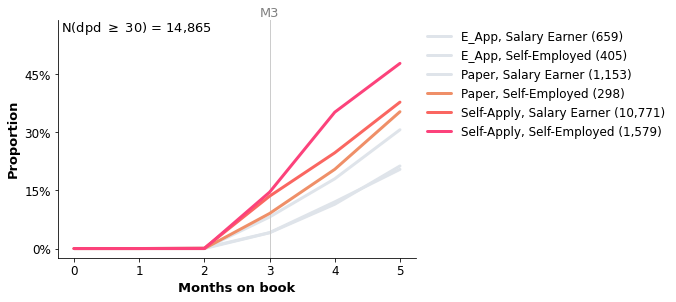

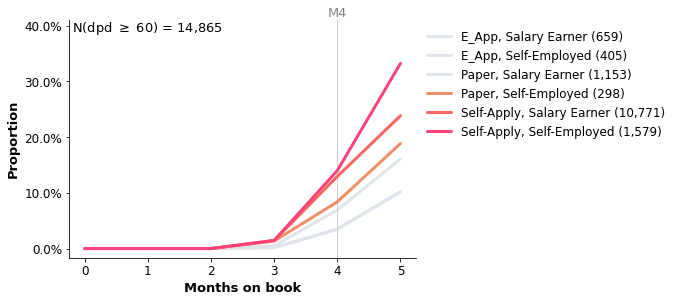

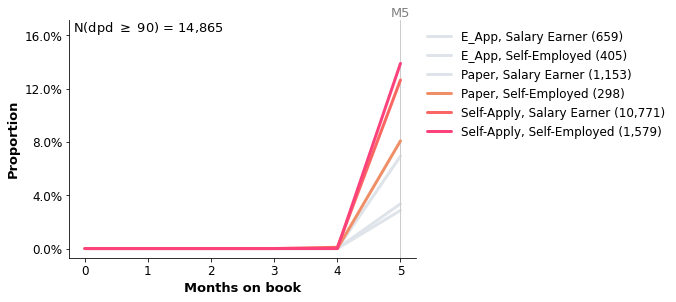

In [16]:
# "flag" "cust_type","apl_grp_type", "pd_lvl2"
groupby = ["apl_grp_type", "cust_type"] 
for dpd_geq,focus in zip([30, 60, 90],["M3","M4","M5"]):
    ax = plt.subplots(figsize=(9.5,4.3))[1]
    ax = plot_vintage(X.loc[(X["clean"]==False)], groupby, 
                      dpd_cols, dpd_geq, ax=ax, colors=colors, 
                      focus=focus, n_tops=3)

In [17]:
vintage_table(X.loc[(X["clean"]==False)], groupby, dpd_cols, 30)

N   M0   M1        M2        M3        M4  \
apl_grp_type cust_type                                                      
E_App        Salary Earner    659  0.0  0.0  0.001524  0.041159  0.120611   
             Self-Employed    405  0.0  0.0  0.000000  0.081481  0.180247   
Paper        Salary Earner   1153  0.0  0.0  0.000000  0.040763  0.114484   
             Self-Employed    298  0.0  0.0  0.000000  0.090604  0.204698   
Self-Apply   Salary Earner  10771  0.0  0.0  0.001022  0.135303  0.247419   
             Self-Employed   1579  0.0  0.0  0.000000  0.145662  0.352345   

                                  M5  
apl_grp_type cust_type                
E_App        Salary Earner  0.204580  
             Self-Employed  0.306931  
Paper        Salary Earner  0.213356  
             Self-Employed  0.353535  
Self-Apply   Salary Earner  0.378295  
             Self-Employed  0.478426

In [18]:
groupby_table(X.loc[X["clean"]==False], groupby, 
              osb_cols, np.nansum, factor=1/10**6)

N       M0_OS       M1_OS       M2_OS  \
apl_grp_type cust_type                                                  
E_App        Salary Earner    659   11.058875   13.631562   13.943881   
             Self-Employed    405   22.888142   25.986056   27.912969   
Paper        Salary Earner   1153   15.513347   24.714790   26.719788   
             Self-Employed    298   22.019984   27.448301   27.682077   
Self-Apply   Salary Earner  10771  203.388605  212.851191  215.557771   
             Self-Employed   1579  101.287724  114.617449  119.127248   

                                 M3_OS       M4_OS       M5_OS  
apl_grp_type cust_type                                          
E_App        Salary Earner   14.312723   14.851871   15.328771  
             Self-Employed   30.213218   32.473604   34.677571  
Paper        Salary Earner   29.067580   31.210420   30.606779  
             Self-Employed   28.379448   30.063153   30.979920  
Self-Apply   Salary Earner  219.774921  230.974344  235.739655  
             Self-Employed  126.382008  135.070855  144.078363

## Roll rate analysis

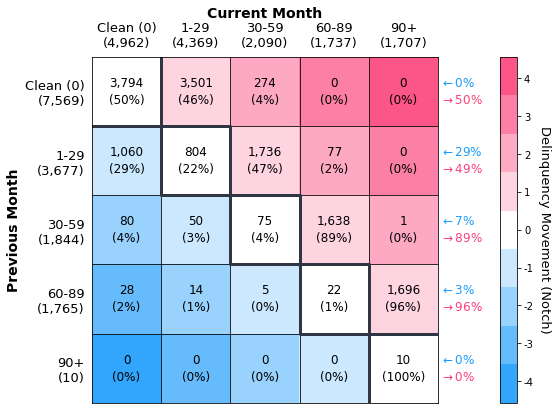

In [19]:
mobs, cond = ["M3","M4"], (X["clean"]==False) 
ax = plot_rollrate(X.loc[cond].copy(), mobs)

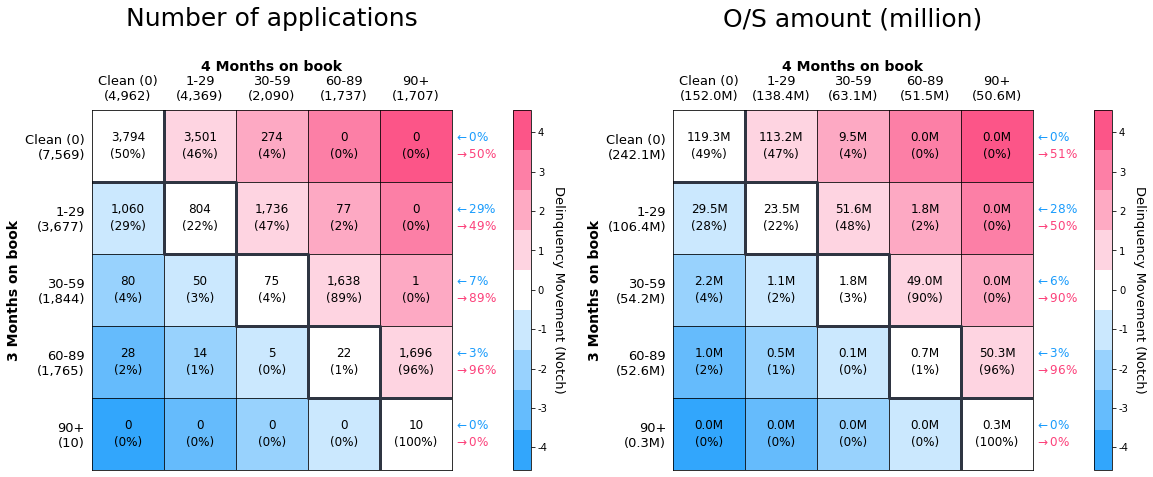

In [20]:
fig, axes = plt.subplots(1,2,figsize=(8.3*2,6.5))
fig.subplots_adjust(hspace=0.3)
mobs, cond = ["M3","M4"], (X["clean"]==False)
labels = np.r_[["{} Months on book".format(s[1:]) for s in mobs]][::-1]
axes[0] = plot_rollrate(X.loc[cond].copy(), mobs, ax=axes[0], labels=labels)
axes[1] = plot_rollrate(X.loc[cond].copy(), mobs, ax=axes[1], labels=labels,
                        values=X["M4_OS"]/10**6, num_format="{:,.1f}M".format)
axes[0].set_title("Number of applications\n", fontsize=25)
axes[1].set_title("O/S amount (million)\n", fontsize=25)
plt.tight_layout()

## % Withdrawal @ M0, and M1
add 90% flag

In [21]:
# "flag","pd_lvl2", "cust_type", "apl_grp_type"]
groupby= ["flag","pd_lvl2", "cust_type"]
aggfnc = {"ip_id" : "count", "M0_pWDL": "mean", "M1_pWDL": "mean"}
rename = {"ip_id":"N", "M0_pWDL": "M0", "M1_pWDL": "M1"}
X.loc[X["clean"]==False].groupby(groupby).agg(aggfnc).rename(columns=rename)

N        M0        M1
flag   pd_lvl2 cust_type                              
Fraud  KEC     Salary Earner   172  0.974616  0.993543
               Self-Employed    47  0.851064  0.999753
Normal CC      Salary Earner  1757  0.148327  0.299757
               Self-Employed   709  0.127012  0.248063
       KEC     Salary Earner  3025  0.768521  0.888476
               Self-Employed   778  0.727745  0.851166
       KPL     Salary Earner  7629  0.993428  0.971926
               Self-Employed   748  0.997143  0.985584

## Observed Default Rate (ODR) by scores

In [22]:
cond = X["fico_scor"].fillna(0)>0
dpd_geq = 60
delq, vals, _ = observed_rate(X.loc[cond], "fico_scor", dpd_cols, osb_cols, 
                              "fnl_cr_lmt", dpd_geq=dpd_geq, bins=20, 
                              factor=1/10**6)

In [23]:
delq.head()

,N,M0,M1,M2,M3,M4,M5
bin_lt,,,,,,,
354,33,0,0,0,0,2,2
380,441,0,0,0,12,33,60
406,1355,0,0,0,16,64,121
432,2293,0,0,3,50,140,228
458,2417,0,0,1,28,95,180


In [24]:
vals.head()

,cr_limit,M0_OS,M1_OS,M2_OS,M3_OS,M4_OS,M5_OS
bin_lt,,,,,,,
354,0.486,0.0,0.0,0.000000,0.000000,0.029029,0.029584
380,7.456,0.0,0.0,0.000000,0.157297,0.551809,1.113792
406,21.880,0.0,0.0,0.000000,0.200573,0.943302,1.897464
432,35.469,0.0,0.0,0.033673,0.829548,2.261537,3.601975
458,36.957,0.0,0.0,0.044618,0.555467,1.627644,2.923831


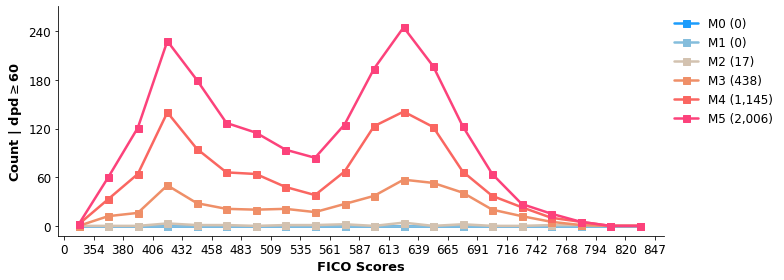

In [25]:
ax = plot_scores(delq, r"Count | dpd$\geq${}".format(dpd_geq), 
                 percent=False, num_format="{:,.0f}".format, colors=colors)

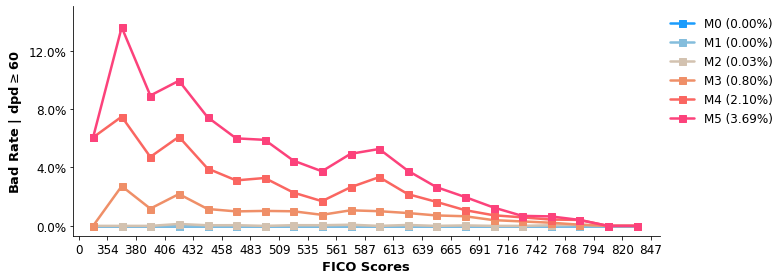

In [26]:
ax = plot_scores(delq, r"Bad Rate | dpd$\geq${}".format(dpd_geq), 
                 percent=True, num_format="{:,.2%}".format, colors=colors)

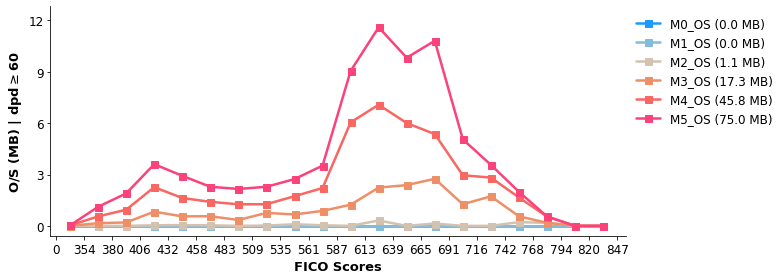

In [27]:
ax = plot_scores(vals, r"O/S (MB) | dpd$\geq${}".format(dpd_geq), 
                 percent=False, num_format="{:,.1f} MB".format, colors=colors)

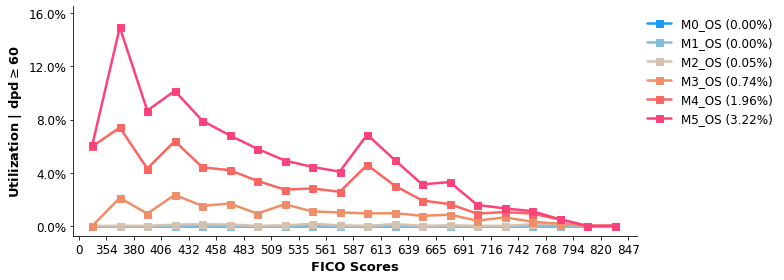

In [28]:
ax = plot_scores(vals, r"Utilization | dpd$\geq${}".format(dpd_geq), 
                 percent=True, num_format="{:,.2%}".format, colors=colors)